 <p style = "font-size: 23px;font-weight: bold;text-align:center;color:#800000"> Web Scrapping using Pandas </p>

<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Pandula
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 07/14/2022

# Let's Scrap the List of countries by number of military and paramilitary personnel

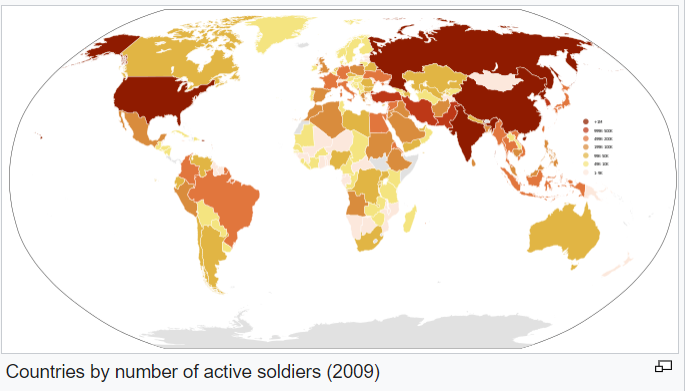

**Let's have a look at military personnel per capital**

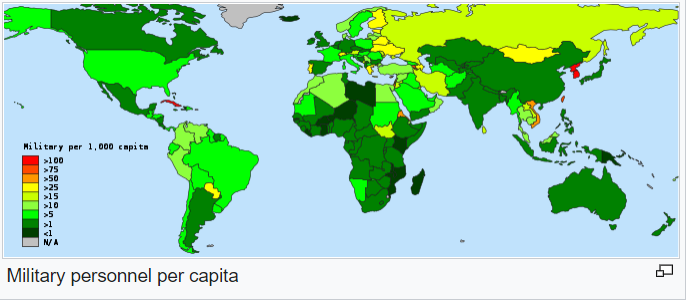

*For more info you can visit this website to read - https://en.wikipedia.org/wiki/List_of_countries_by_number_of_military_and_paramilitary_personnel*

# Steps to follow -
- Read the url
- Use pandas read html command
- Filter the data
- Clean the data
- Now you are ready to go

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the URL

## Step-1

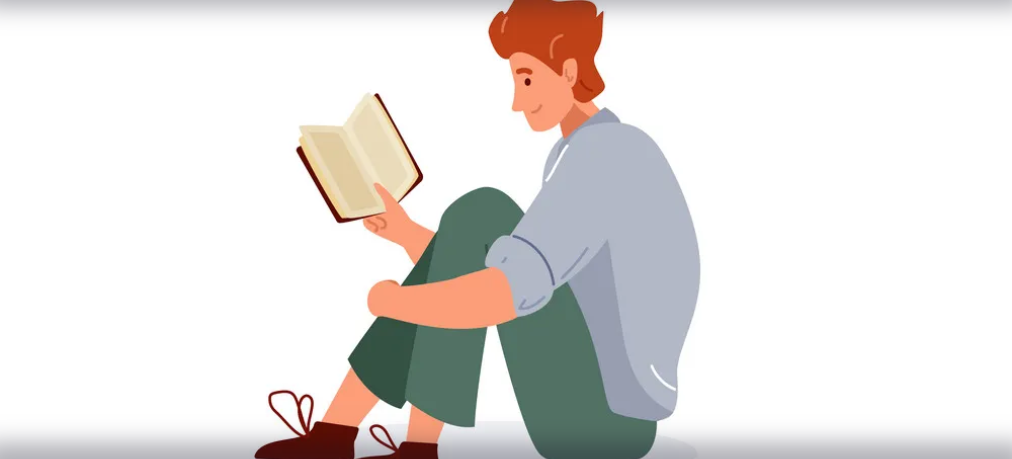

In [2]:
#url
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_number_of_military_and_paramilitary_personnel'

# Using Pandas to get the table from the Web Page

## Step -2

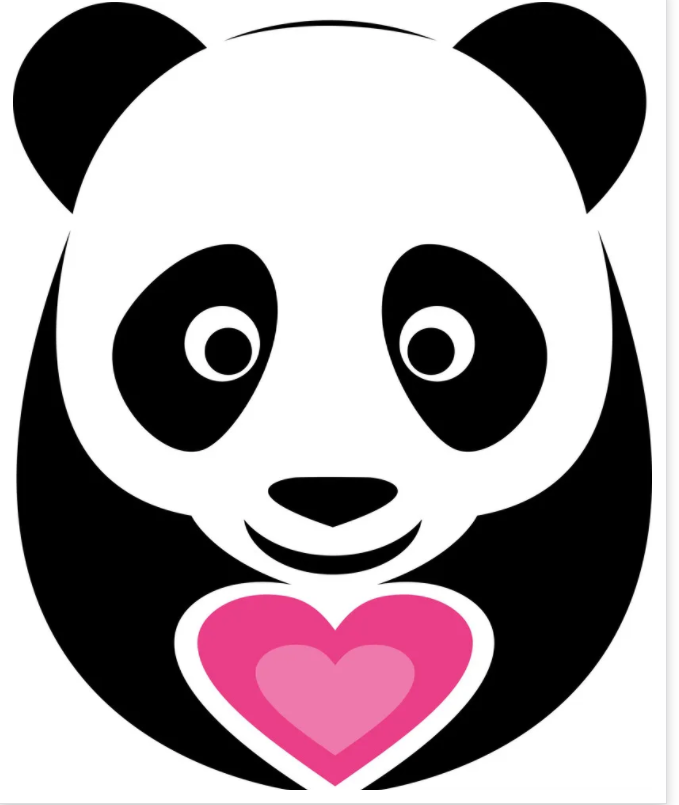

In [3]:
df = pd.read_html(url, header = 0)
display(df)

[     Flag                 Country  Active military  Reserve military  \
 0     NaN          Afghanistan[3]           250000             75000   
 1     NaN              Albania[4]             8000                 0   
 2     NaN              Algeria[5]           130000            150000   
 3     NaN               Angola[6]           107000                 0   
 4     NaN  Antigua and Barbuda[7]              180                80   
 ..    ...                     ...              ...               ...   
 167   NaN          Venezuela[161]           123000              8000   
 168   NaN            Vietnam[162]           482000           5000000   
 169   NaN              Yemen[163]            40000                 0   
 170   NaN             Zambia[164]            15100              3000   
 171   NaN           Zimbabwe[165]            29000                 0   
 
      Paramilitary    Total  Per 1,000 capita(total)  Per 1,000 capita(active)  
 0          170000   495000              

# Filter the data

## Step-3

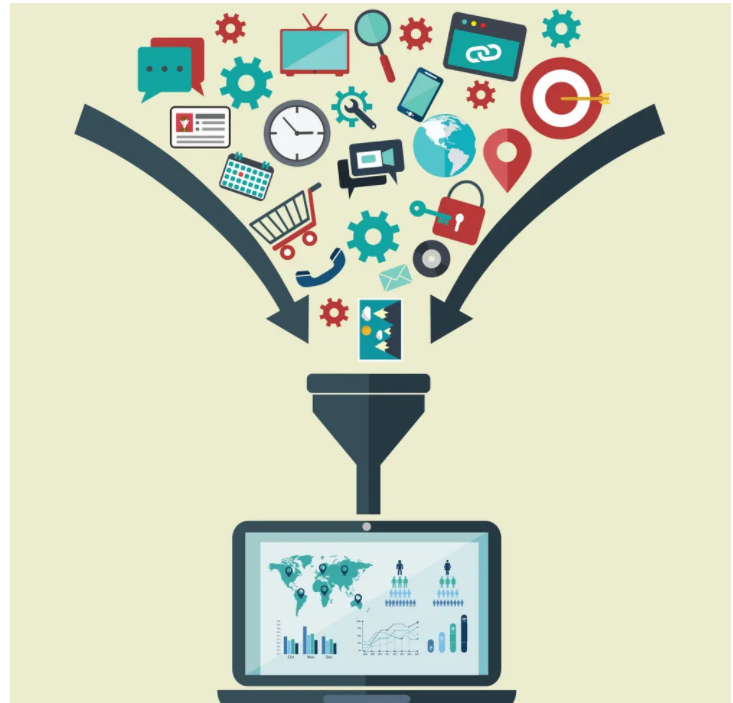

In [4]:
#Checking the len
print("\nThe length of the dataframe is : ",len(df),"\n")
#putting the entire dataframe in another variable
df_f = df[0]
# # print("\n The length of the dataframe after cleaning_1 :",len(df_f))
display(df_f)


The length of the dataframe is :  2 



,Flag,Country,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(total)","Per 1,000 capita(active)"
0,NaN,Afghanistan[3],250000,75000,170000,495000,14.2,7.2
1,NaN,Albania[4],8000,0,0,8000,2.6,2.6
2,NaN,Algeria[5],130000,150000,187200,467200,11.2,3.1
3,NaN,Angola[6],107000,0,10000,117000,3.9,3.5
4,NaN,Antigua and Barbuda[7],180,80,0,260,2.7,1.9
...,...,...,...,...,...,...,...,...
167,NaN,Venezuela[161],123000,8000,220000,351000,11.1,3.9
168,NaN,Vietnam[162],482000,5000000,40000,5522000,56.9,5.0
169,NaN,Yemen[163],40000,0,0,40000,1.4,1.4
170,NaN,Zambia[164],15100,3000,1400,19500,1.2,0.9


# Clean the data

## Step-4

In [5]:
# Remove the Flag
df_f.drop(['Flag'],axis=1,inplace=True)
df_f.head()

,Country,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(total)","Per 1,000 capita(active)"
0,Afghanistan[3],250000,75000,170000,495000,14.2,7.2
1,Albania[4],8000,0,0,8000,2.6,2.6
2,Algeria[5],130000,150000,187200,467200,11.2,3.1
3,Angola[6],107000,0,10000,117000,3.9,3.5
4,Antigua and Barbuda[7],180,80,0,260,2.7,1.9


In [8]:
#removing the special charcter from country name
df_f['Country'] = df_f['Country'].str.replace('[','')
df_f['Country'] = df_f['Country'].str.replace(']','')
df_f['Country'] = df_f['Country'].str.replace('\d+', '')
df_f.head()

<ipython-input-8-c97a6bafc89b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_f['Country'] = df_f['Country'].str.replace('[','')
<ipython-input-8-c97a6bafc89b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_f['Country'] = df_f['Country'].str.replace(']','')
<ipython-input-8-c97a6bafc89b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_f['Country'] = df_f['Country'].str.replace('\d+', '')


,Country,Active military,Reserve military,Paramilitary,Total,"Per 1,000 capita(total)","Per 1,000 capita(active)"
0,Afghanistan,250000,75000,170000,495000,14.2,7.2
1,Albania,8000,0,0,8000,2.6,2.6
2,Algeria,130000,150000,187200,467200,11.2,3.1
3,Angola,107000,0,10000,117000,3.9,3.5
4,Antigua and Barbuda,180,80,0,260,2.7,1.9


In [9]:
df_f.shape

(172, 7)

**Now you can use it as per your need**

# Visualizing the Diff active military

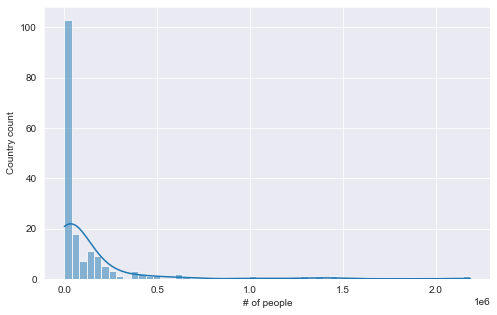

In [10]:
# Set Seaborn style
sns.set_style('darkgrid')

# Construct plot
plt.figure(figsize=(8,5))
ax = sns.histplot(x = "Active military", data = df_f, kde = True)
ax.set(xlabel='# of people', ylabel='Country count')
plt.show()

# Save it to CSV and explore

In [11]:
#df_f.to_csv('List_of_countries_by_number_of_military_and_paramilitary_personnel.csv',index=False)